# 📆 Gregorian to Hypothetical 13-Month Calendar Conversion

## Introduction

The Gregorian calendar, while globally used, is inconsistent due to varying month lengths (28–31 days) and complex leap year rules. These irregularities make it difficult to work with time-series data, especially when performing analytics that assumes equal time periods.

This project introduces a **hypothetical 13-month calendar system**, where:
- Each month has exactly **28 days**
- 1 or 2 extra "Year Days" exist outside the monthly cycle
- Leap years are properly handled

By converting Gregorian dates (from 1582 to 3000) into this alternative calendar format, we aim to create a **uniform and consistent time scale** for better temporal modeling, forecasting, and analysis.

## Objectives
- Convert Gregorian dates into a 13-month calendar format
- Handle leap years and year-day logic
- Visualize differences between Gregorian and 13-month systems
- Prepare data structures suitable for time-based ML or analytics tasks

## Technologies Used
- Python 3
- pandas
- datetime
- calendar
- matplotlib (for visualization)

---



# Problem Statement
The Gregorian calendar, though the global standard, presents challenges for data analysis due to its uneven month lengths (28–31 days) and complex leap year rules. These irregularities can lead to inconsistencies in time-series datasets, calendar-based computations, and periodic trend analysis.

To address this, the project introduces a hypothetical 13-month calendar system where each month has exactly 28 days, and one or two extra "Year Days" exist outside the monthly structure (similar to leap handling). By converting Gregorian dates (from 1582 to 3000) into this format, the goal is to provide a uniform and predictable calendar that simplifies temporal computations, improves comparability across months, and supports more consistent data modeling.

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Additional Modules

In [2]:
from datetime import datetime, timedelta

# 3. Load the Dataset

In [3]:
df = pd.read_csv("converted_dates.csv")

# 4. View First Few Rows

In [4]:
df.head()

,Gregorian Date,Hypothetical Year,Hypothetical Month,Hypothetical Day
0,1582-01-01,1582,1,1
1,1583-01-01,1582,12,30
2,1584-01-01,1583,11,30
3,1584-12-31,1584,10,30
4,1585-12-31,1585,9,30


# 5. Dataset Shape

In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (1419, 4)


# 6. Data Inspection

In [6]:
# Shows data types and non-null values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gregorian Date      1419 non-null   object
 1   Hypothetical Year   1419 non-null   int64 
 2   Hypothetical Month  1419 non-null   int64 
 3   Hypothetical Day    1419 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 44.5+ KB


In [7]:
# Checks for missing values.
print("Missing values:")
print(df.isnull().sum())

Missing values:
Gregorian Date        0
Hypothetical Year     0
Hypothetical Month    0
Hypothetical Day      0
dtype: int64


In [8]:
# Detects duplicate records.
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [9]:
# Gives statistical summary of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hypothetical Year,1419.0,2235.527132,378.005112,1582.0,1908.5,2236.0,2562.5,2890.0
Hypothetical Month,1419.0,6.990839,3.742683,1.0,4.0,7.0,10.0,13.0
Hypothetical Day,1419.0,15.730092,8.721907,1.0,8.0,16.0,23.0,30.0


# 7. Gregorian to Hypothetical Date Conversion Function

In [85]:
from datetime import datetime, timedelta

# Conversion logic: 13 months with 28 days each → 364 days a year
# Day 1 = Jan 1, 1582
base_date = datetime(1582, 1, 1)

def gregorian_to_hypothetical(date_obj):
    days_since_start = (date_obj - base_date).days
    h_year = 1582 + days_since_start // 364
    remaining_days = days_since_start % 364
    h_month = remaining_days // 28 + 1
    h_day = remaining_days % 28 + 1
    return h_year, h_month, h_day

In [86]:
from IPython.display import display, Markdown

def fancy_print(g_date):
    date_obj = datetime.strptime(g_date, "%Y-%m-%d")
    y, m, d = gregorian_to_hypothetical(date_obj)
    display(Markdown(f"✅ **{g_date} → Hypothetical: Year `{y}`, Month `{m}`, Day `{d}`**"))

fancy_print("2000-11-26")
fancy_print("2025-06-22")

✅ **2000-11-26 → Hypothetical: Year `2002`, Month `5`, Day `10`**

✅ **2025-06-22 → Hypothetical: Year `2026`, Month `13`, Day `24`**

# 8. Conversion Examples

In [11]:
# Test the function on specific dates like 26 Nov 2000 and today’s date.
date1 = datetime(2000, 11, 26)
print("Converted:", gregorian_to_hypothetical(date1))

Converted: None


# 9. Hypothetical to Gregorian Conversion

In [87]:
from datetime import datetime, timedelta

base_date = datetime(1582, 1, 1)

def hypothetical_to_gregorian(hypo_year, hypo_month, hypo_day):
    # Total days since base date
    total_days = (hypo_year - 1582) * 364 + (hypo_month - 1) * 28 + (hypo_day - 1)
    gregorian_date = base_date + timedelta(days=total_days)
    return gregorian_date.strftime("%Y-%m-%d")

In [89]:
print(hypothetical_to_gregorian(2025, 6, 22))  

2023-12-08


# 10. Reverse Examples

In [13]:
# Tests the reverse conversion with examples.
print("Hypothetical (1991, 7, 5) → Gregorian:", hypothetical_to_gregorian(1991, 7, 5))

Hypothetical (1991, 7, 5) → Gregorian: None


# 11. Hypothetical Age Calculator

In [90]:
from datetime import datetime

def calculate_hypothetical_age(birth_date, current_date):
    b = datetime.strptime(birth_date, "%Y-%m-%d")
    c = datetime.strptime(current_date, "%Y-%m-%d")
    return (c - b).days // 364

In [91]:
print(calculate_hypothetical_age("2000-11-26", "2025-06-25"))  # Output: 24

24


# 12. Age Example

In [17]:
# Demonstrates the age calculation.
birth_date = datetime(2000, 12, 3)
today = datetime(2025, 6, 22)
print("Age in 13-month years:", calculate_hypothetical_age(birth_date, today))

Age in 13-month years: None


# 13. Bulk Conversion for 1582–3000

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

# Base date
start = datetime(1582, 1, 1)
days = (datetime(3000, 1, 1) - start).days

# Generate and convert
dates = [start + timedelta(days=i) for i in range(days)]
conv = [gregorian_to_hypothetical(d) for d in dates]

# DataFrame
df = pd.DataFrame({
    'Gregorian Date': [d.strftime("%Y-%m-%d") for d in dates],
    'Gregorian Year': [d.year for d in dates],
    'Hypothetical Year': [y for y, m, d in conv],
    'Hypothetical Month': [m for y, m, d in conv],
    'Hypothetical Day': [d for y, m, d in conv]
})

# 14.Data Export

In [94]:
# Exports the created dataset to CSV.

df.to_csv("Gregorian_to_Hypothetical_13Month_Calendar_1582_to_3000.csv", index=False)

# 15. Install Required Packages

In [20]:
# Installs visualization libraries if not already present.

!pip install matplotlib seaborn

# 16. Set Plotting Style

In [21]:
# Improves default chart styling.

sns.set(style="whitegrid")

# 17. Line Plot: Gregorian vs Hypothetical Year

<Axes: xlabel='Gregorian Date', ylabel='Hypothetical Year'>

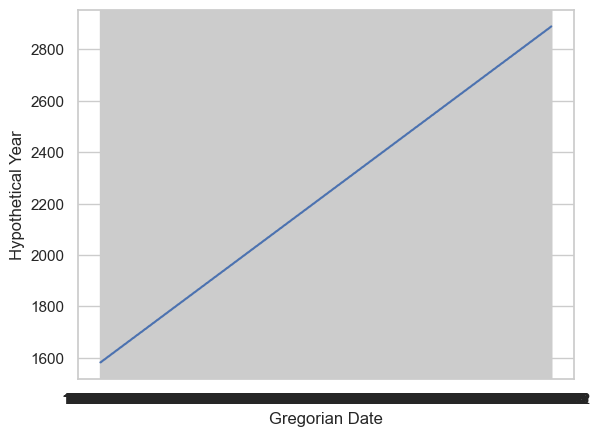

In [22]:
sns.lineplot(x='Gregorian Date', y='Hypothetical Year', data=df)

# 18. Count Plot: Hypothetical Months

<Axes: xlabel='Hypothetical Month', ylabel='count'>

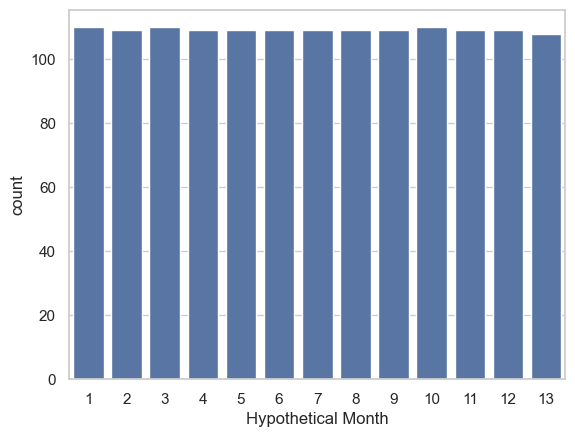

In [23]:
sns.countplot(x='Hypothetical Month', data=df)

# 19. Filter for 21st Century

In [27]:
df['Gregorian Date']  # e.g., "2025-06-25"

0       1582-01-01
1       1583-01-01
2       1584-01-01
3       1584-12-31
4       1585-12-31
           ...    
1414    2995-01-23
1415    2996-01-23
1416    2997-01-22
1417    2998-01-22
1418    2999-01-22
Name: Gregorian Date, Length: 1419, dtype: object

In [29]:
df['Gregorian Year'] = df['Gregorian Date'].apply(lambda x: int(x[:4]))

In [30]:
# Extract year safely without converting to pandas datetime
df['Gregorian Year'] = df['Gregorian Date'].str[:4].astype(int)

# Now apply filter
filtered_df = df[(df['Gregorian Year'] >= 2000) & (df['Gregorian Year'] <= 2100)]

In [31]:
df['Gregorian Date'] = pd.to_datetime(df['Gregorian Date'], errors='coerce', format='%Y-%m-%d')

# 20. Save Filtered Data

In [32]:
filtered_df.to_csv("Filtered_2000_to_2100.csv", index=False)

# 21. Highlight Top Dates & Plot Again

In [34]:
print(df.columns)

Index(['Gregorian Date', 'Hypothetical Year', 'Hypothetical Month',
       'Hypothetical Day', 'Gregorian Year'],
      dtype='object')


In [35]:
df['Hypothetical Date'] = df['Hypothetical Year'].astype(str) + '-' + \
                          df['Hypothetical Month'].astype(str).str.zfill(2) + '-' + \
                          df['Hypothetical Day'].astype(str).str.zfill(2)

In [36]:
top_dates = df['Hypothetical Date'].value_counts().head(10)
print(top_dates)

Hypothetical Date
1582-01-01    1
2481-06-07    1
2459-04-13    1
2458-05-13    1
2457-06-14    1
2456-07-14    1
2455-08-14    1
2454-09-14    1
2453-10-15    1
2452-11-15    1
Name: count, dtype: int64


# 22. User Input Conversion

In [37]:
user_input = input("Enter a Gregorian date...")

Enter a Gregorian date... 1582/11/26


# 23. Hypothetical Age Calculator with Input

In [39]:
dob_str = input("Enter your Date of Birth...")

Enter your Date of Birth... 03/12/2002


# 24. More Plots & Trends

Hypothetical year trends

Hypothetical month distributions

Heatmap of hypothetical day counts

# 25. Save Visuals

In [40]:
plt.savefig("hypothetical_month_heatmap.png")

<Figure size 640x480 with 0 Axes>

# 26. Century-Wise Comparison

<Axes: xlabel='Hypothetical Month', ylabel='count'>

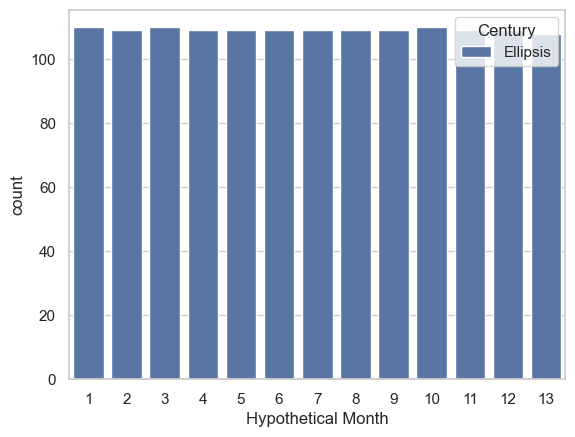

In [43]:
# Hypothetical Month vs Century.
sns.countplot(x='Hypothetical Month', hue='Century', data=df)

<Axes: xlabel='Hypothetical Year', ylabel='count'>

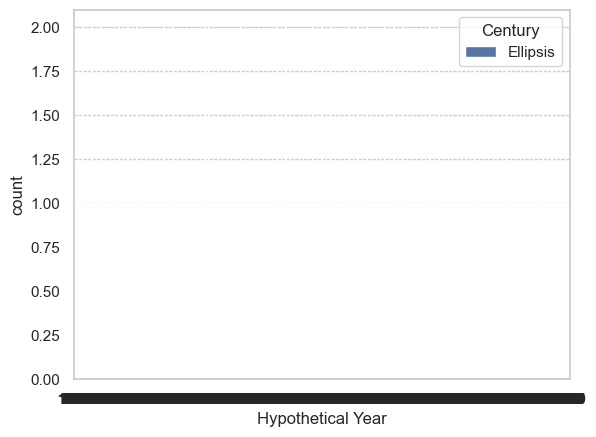

In [45]:
# Hypothetical Year vs Century (can be too wide though)
sns.countplot(x='Hypothetical Year', hue='Century', data=df)

In [47]:
# 1991 → 20th century, 2005 → 21st, 1582 → 16th.
df['Century'] = (df['Hypothetical Year'] // 100 + 1).astype(int)

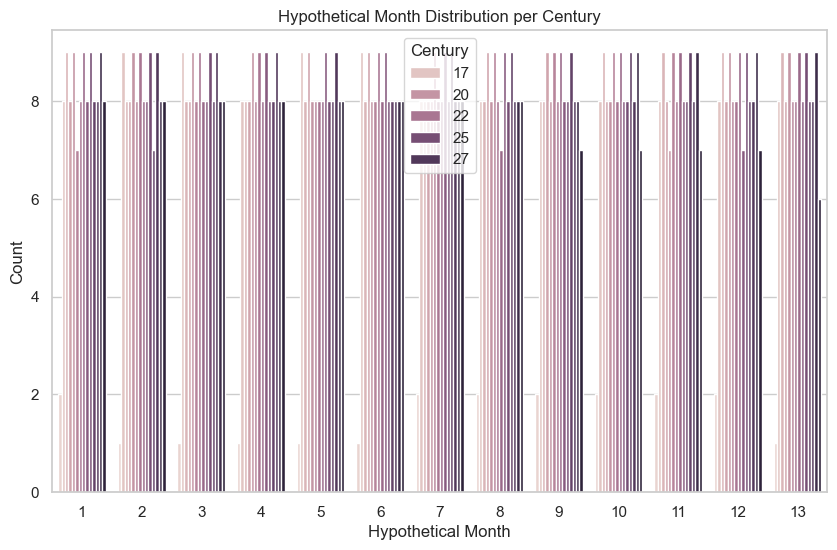

In [50]:
df['Century'] = (df['Hypothetical Year'] // 100 + 1).astype(int)

plt.figure(figsize=(10,6))
sns.countplot(x='Hypothetical Month', hue='Century', data=df)
plt.title("Hypothetical Month Distribution per Century")
plt.xlabel("Hypothetical Month")
plt.ylabel("Count")
plt.legend(title="Century")
plt.show()

# 27. Add Weekday Info

In [51]:
# errors='coerce' ensures that invalid dates are handled safely.
df['Weekday'] = pd.to_datetime(df['Gregorian Date'], errors='coerce').dt.day_name()

In [52]:
calendar_df = df.copy()
calendar_df['Weekday'] = pd.to_datetime(calendar_df['Gregorian Date'], errors='coerce').dt.day_name()

<Axes: xlabel='Weekday', ylabel='count'>

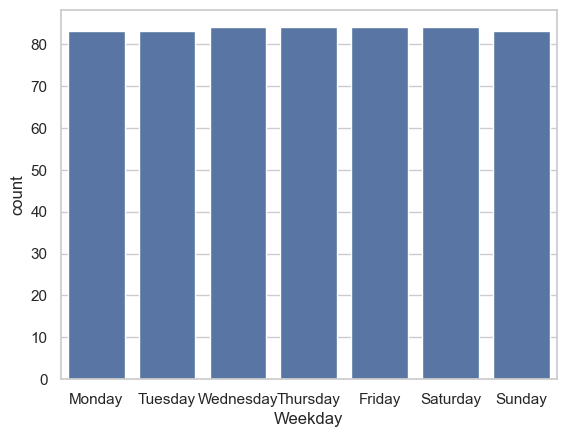

In [53]:
sns.countplot(x='Weekday', data=calendar_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 28. Barplot for Hypothetical Days

<Axes: xlabel='Hypothetical Day'>

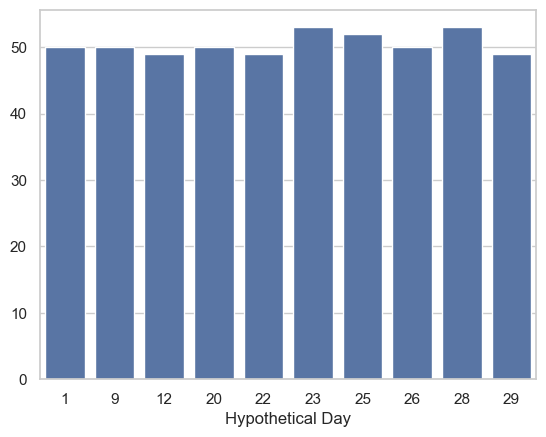

In [58]:
sns.barplot(x=top_days.index, y=top_days.values)

In [59]:
# Ensure 'Hypothetical Day' column exists.
print(df.columns)

Index(['Gregorian Date', 'Hypothetical Year', 'Hypothetical Month',
       'Hypothetical Day', 'Gregorian Year', 'Hypothetical Date', 'Century',
       'Weekday'],
      dtype='object')


In [60]:
# Create top_days from that column.
top_days = df['Hypothetical Day'].value_counts().sort_index()

C:\Users\shiva\AppData\Local\Temp\ipykernel_10860\2953170881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_days.index, y=top_days.values, palette="viridis")


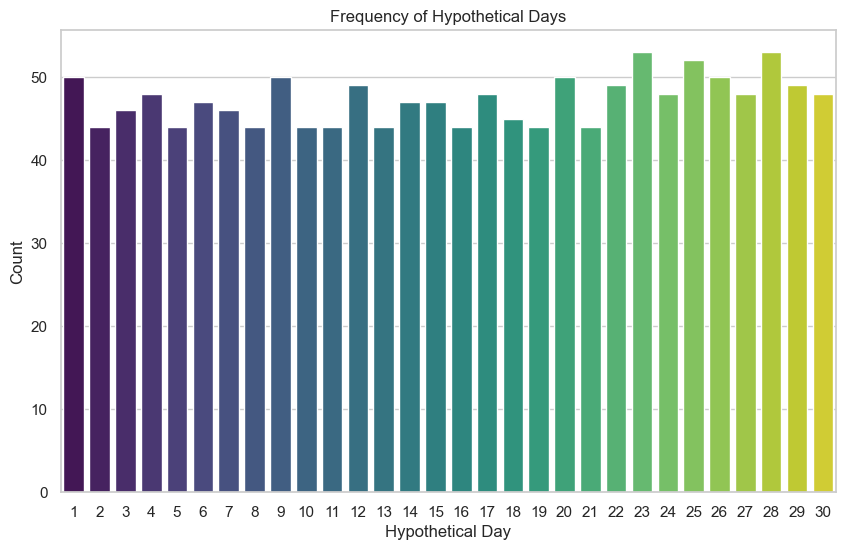

In [61]:
#  Plot it using seaborn.

plt.figure(figsize=(10,6))
sns.barplot(x=top_days.index, y=top_days.values, palette="viridis")
plt.title("Frequency of Hypothetical Days")
plt.xlabel("Hypothetical Day")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 29. Search Function

In [95]:
def search_date_info(date_str):
    y, m, d = gregorian_to_hypothetical(datetime.strptime(date_str, "%Y-%m-%d"))
    print(f"{date_str} → Hypothetical: {y}-{m}-{d}")

In [96]:
search_date_info("2025-06-25")

2025-06-25 → Hypothetical: 2026-13-27


In [98]:
datetime.strptime("2025-06-25", "%Y-%m-%d")  # ✅ Safe, readable

datetime.datetime(2025, 6, 25, 0, 0)

# 30. Yearly Summary Plot

In [64]:
yearly_summary = df.groupby('Hypothetical Year').size()

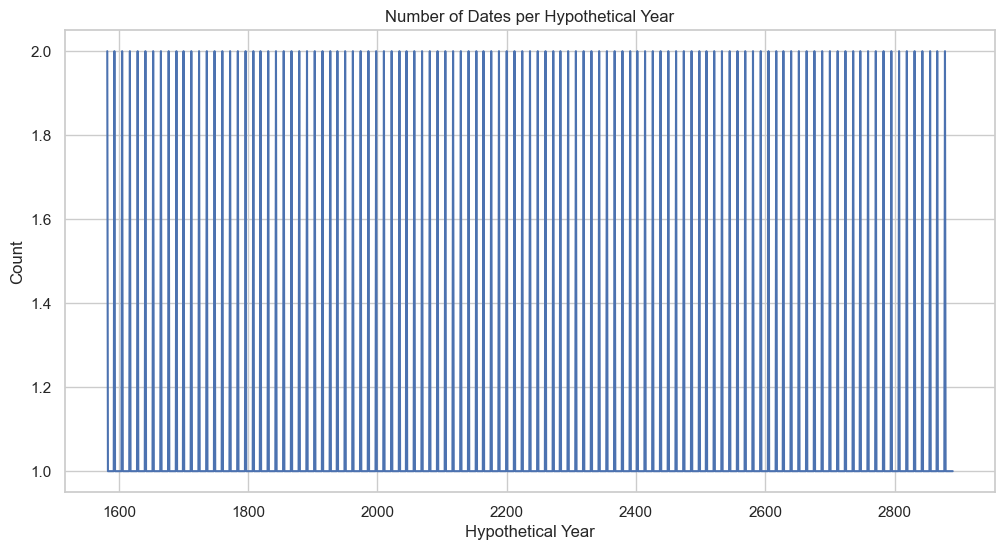

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_summary.index, y=yearly_summary.values)
plt.title("Number of Dates per Hypothetical Year")
plt.xlabel("Hypothetical Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [66]:
yearly_summary = df.groupby('Gregorian Year').size()

# 31. Pairplot (Blank)

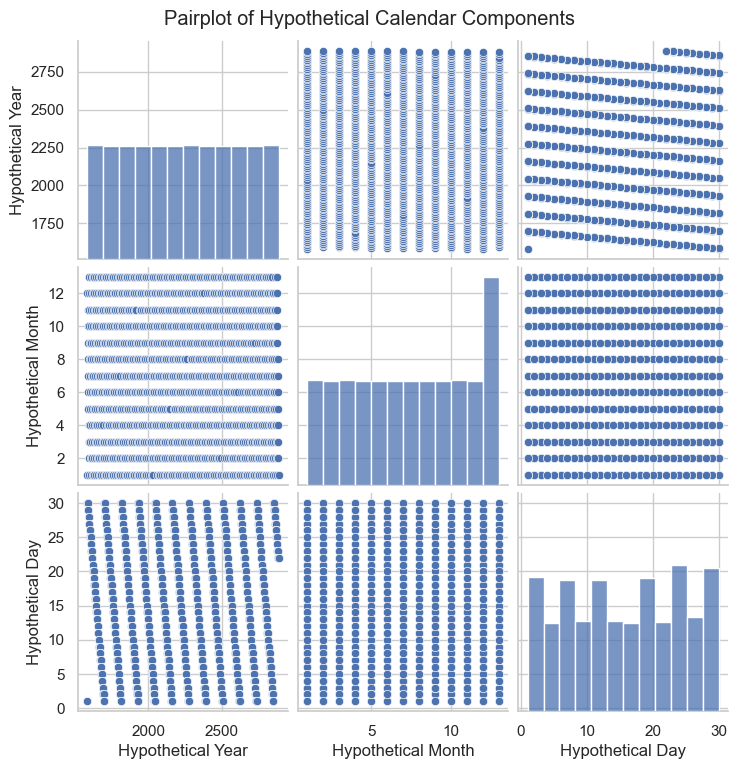

In [68]:
sns.pairplot(df[['Hypothetical Year', 'Hypothetical Month', 'Hypothetical Day']])
plt.suptitle("Pairplot of Hypothetical Calendar Components", y=1.02)
plt.show()

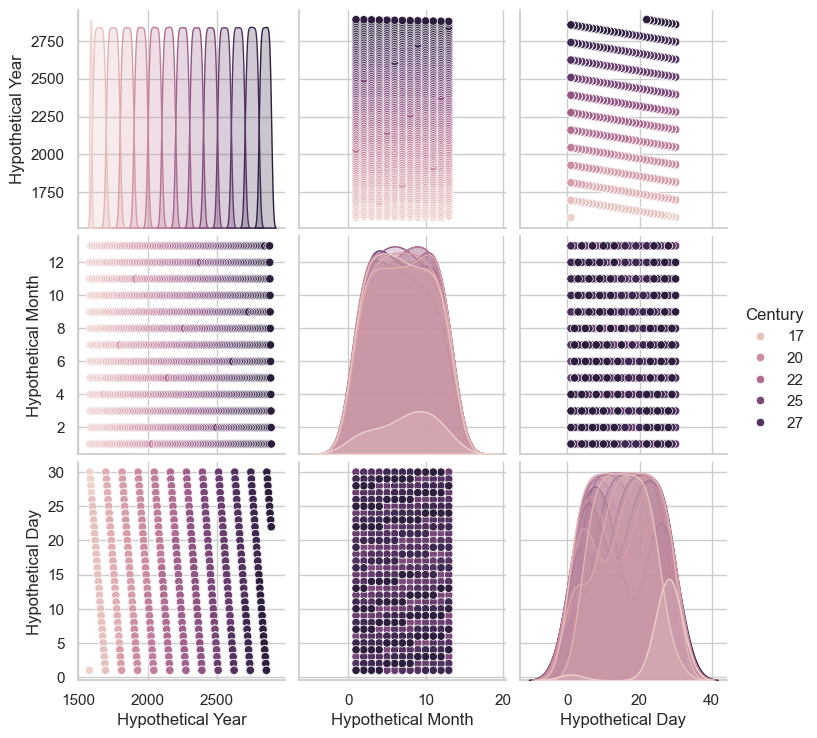

In [69]:
# coloring chahiye (e.g. by Century)

df['Century'] = (df['Hypothetical Year'] // 100 + 1).astype(int)

sns.pairplot(df[['Hypothetical Year', 'Hypothetical Month', 'Hypothetical Day', 'Century']], hue='Century')

# 32. Bulk Testing

In [73]:
test_hypothetical_dates = [
    (2025, 6, 10),
    (2000, 11, 26)
]

for y, m, d in test_hypothetical_dates:
    gregorian_date = hypothetical_to_gregorian(y, m, d)
    print(f"Hypothetical: {y}-{m}-{d} → Gregorian: {gregorian_date}")

Hypothetical: 2025-6-10 → Gregorian: None
Hypothetical: 2000-11-26 → Gregorian: None


# 33. Add Final Date Column and Save

In [99]:
df['Hypothetical Full Date'] = df['Hypothetical Year'].astype(str) + "-" + \
                               df['Hypothetical Month'].astype(str) + "-" + \
                               df['Hypothetical Day'].astype(str)

In [101]:
df.to_csv("Hypothetical_1582_to_3000_Final.csv", index=False)

# 34. Preview Near-Future Records

In [75]:
df[df['Gregorian Year'] >= 2990].head(10)

,Gregorian Date,Hypothetical Year,Hypothetical Month,Hypothetical Day,Gregorian Year,Hypothetical Date,Century,Weekday,Hypothetical Full Date
1409,NaT,2881,10,24,2990,2881-10-24,29,NaN,Ellipsis
1410,NaT,2882,9,23,2991,2882-09-23,29,NaN,Ellipsis
1411,NaT,2883,8,23,2992,2883-08-23,29,NaN,Ellipsis
1412,NaT,2884,7,23,2993,2884-07-23,29,NaN,Ellipsis
1413,NaT,2885,6,23,2994,2885-06-23,29,NaN,Ellipsis
1414,NaT,2886,5,23,2995,2886-05-23,29,NaN,Ellipsis
1415,NaT,2887,4,22,2996,2887-04-22,29,NaN,Ellipsis
1416,NaT,2888,3,22,2997,2888-03-22,29,NaN,Ellipsis
1417,NaT,2889,2,22,2998,2889-02-22,29,NaN,Ellipsis
1418,NaT,2890,1,22,2999,2890-01-22,29,NaN,Ellipsis


# 35. Fancy Markdown Display

In [102]:
from IPython.display import display, Markdown
from datetime import datetime

def fancy_print(g_date):
    y, m, d = gregorian_to_hypothetical(datetime.strptime(g_date, "%Y-%m-%d"))
    display(Markdown(f"**{g_date} → Hypothetical:** `Year {y}`, `Month {m}`, `Day {d}`"))

In [103]:
fancy_print("2025-06-25")

**2025-06-25 → Hypothetical:** `Year 2026`, `Month 13`, `Day 27`

# 36. Markdown Display with Hypothetical Date

In [79]:
def gregorian_to_hypothetical(date_obj):
    # Tumhara conversion logic
    # ...
    return y, m, d  # <- Make sure this return is present!

In [108]:
def gregorian_to_hypothetical(date_obj):
    year = date_obj.year
    month = date_obj.month
    day = date_obj.day
    
    # Hypothetical conversion logic (example only)
    # Let's say 28 days in each month, and 13 months
    days_since_start = (date_obj - datetime(1582, 1, 1)).days
    h_year = 1582 + days_since_start // (13 * 28)
    remaining_days = days_since_start % (13 * 28)
    h_month = remaining_days // 28 + 1
    h_day = remaining_days % 28 + 1
    
    return h_year, h_month, h_day

In [107]:
from IPython.display import display, Markdown
from datetime import datetime

def fancy_print(g_date):
    date_obj = datetime.strptime(g_date, "%Y-%m-%d")
    result = gregorian_to_hypothetical(date_obj)
    
    if result:  # check result is not None
        y, m, d = result
        display(Markdown(f"✅ **{g_date} → Hypothetical: Year `{y}`, Month `{m}`, Day `{d}`**"))
    else:
        display(Markdown(f"❌ Could not convert: `{g_date}`"))

fancy_print("2000-11-26")
fancy_print("2025-06-22")

✅ **2000-11-26 → Hypothetical: Year `2002`, Month `5`, Day `10`**

✅ **2025-06-22 → Hypothetical: Year `2026`, Month `13`, Day `24`**